In [1]:
# Import dependencies 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time 
import json

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import API key
from config import api_key

In [31]:
# Range of latitudes and longitudes 
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [30]:
city = citipy.nearest_city(22.99, 120.21)
city.city_name     # Tainan, my home town

'tainan'

In [14]:
# Save config information
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'metric'

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [22]:
cities = 'Monterrey Guadalajara Puebla'.split()
lat = []
lon = []
tmp = []

for city in cities:
    url = query_url + city
    response = requests.get(url)
    data= response.json()
    #print(json.dumps(data, indent=2))
    lat.append(data['coord']['lat'])
    lon.append(data['coord']['lon'])
    tmp.append(data['main']['temp'])


In [23]:
df = pd.DataFrame({'latitude': lat,
                  'longitude':lon,
                  'temp': tmp})
df.head()

,latitude,longitude,temp
0,25.6667,-100.3167,4.48
1,20.6667,-103.3333,14.98
2,18.8333,-98.0000,12.21


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

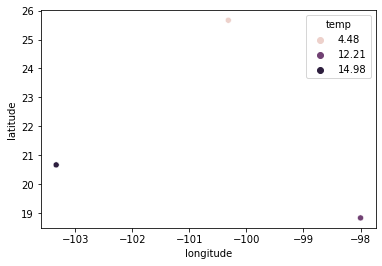

In [26]:
sns.scatterplot(data=df, x='longitude', y='latitude', hue='temp')

The first requirement is to create a series of scatter plots to showcase the following relationships:

- Temperature (F) vs. Latitude

- Humidity (%) vs. Latitude

- Cloudiness (%) vs. Latitude

- Wind Speed (mph) vs. Latitude

